Python 3.8.19

### 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings(action='ignore')
from konlpy.tag import Kkma
import re 
from gensim import corpora
import gensim
from collections import Counter

In [2]:
data1 = pd.read_csv('../data/review_page1.csv', encoding='utf-16').iloc[:, 1:]
data2 = pd.read_csv('../data/review_page2.csv')
data3 = pd.read_csv('../data/review_page3.csv').iloc[:, 2:]
data4 = pd.read_csv('../data/review_page4.csv').iloc[:, 1:]
data5 = pd.read_csv('../data/review_page5.csv').iloc[:, 1:]

data = pd.concat([data1, data2, data3, data4, data5]).reset_index(drop=True)
data['review'] = data['review'].str.replace('\n', ' ')
data.to_csv('review_page_total.csv', encoding='utf-8-sig')

data = pd.read_csv('review_page_total.csv', encoding='utf-8-sig', index_col=0)
data

,name,date,product,detail,score,review,help_cnt,style_cnt,type,category,sex,price,tag
0,LV.5 oct21,2023.07.30,노트 스트링 플랫폼 샌들(남여공용)[n5212],women/black/235mm,5.0,푹신푹신해서 오래신어두 발 안아프고 좋으네용 어느 코디에든 휘뚤마뚤 신을 수 있어서...,2,4.0,style,샌들,"남성, 여성",89000,"사이즈-보통이에요, 밝기-보통이에요, 색감-보통이에요, 발볼-보통이에요, 착화감-편..."
1,LV.4 교쟈만듀,2023.06.14,노트 스트링 플랫폼 샌들(남여공용)[n5212],women/cream/245mm,5.0,치마 원피스 바지에 무난하게 잘 어울려서 코디 하기 좋아요! 그리고 신고 벗기가 편...,4,2.0,style,샌들,"남성, 여성",89000,"사이즈-보통이에요, 밝기-보통이에요, 색감-선명해요, 발볼-넓어요, 착화감-편안해요..."
2,LV.5 Trust_m,2023.06.24,노트 스트링 플랫폼 샌들(남여공용)[n5212],women/black/250mm,5.0,유니크하구 편안해보여서 구매했는데 역시 딱 좋습니다! 오래 신을 거 같아요! 정사이...,2,3.0,style,샌들,"남성, 여성",89000,"사이즈-보통이에요, 밝기-보통이에요, 색감-보통이에요, 발볼-보통이에요, 착화감-적..."
3,LV.5 닝낭농낭,2023.07.27,노트 스트링 플랫폼 샌들(남여공용)[n5212],men/black/275mm,4.0,일단 생긴게 유니크하고 이뻐서 여름에 자주 신을 것 같습니다. 굽도 꽤 있어서 키높...,2,2.0,style,샌들,"남성, 여성",89000,"사이즈-보통이에요, 밝기-어두워요, 색감-보통이에요, 발볼-보통이에요, 착화감-적당..."
4,LV.3 웅스젱,2023.11.15,노트 스트링 플랫폼 샌들(남여공용)[n5212],women/black/240mm,5.0,"좋아욥!! 궈여워요~~ 그치만 발에 땀이 나면 곤란해요,,",2,1.0,style,샌들,"남성, 여성",89000,"사이즈-보통이에요, 밝기-보통이에요, 색감-보통이에요, 발볼-보통이에요, 착화감-적..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169729,LV.3 장마엔청색롱패딩,2022.08.17,ORIGINAL 1910 첼시부츠_스틸그레이,AU7 255~260,5.0,편하고 가벼운 챌시부츠여서 여기저기 잘 신을 거 같아요,0,NaN,general,부츠,"남성, 여성",269000,"사이즈-보통이에요, 밝기-보통이에요, 색감-보통이에요, 발볼-넓어요, 착화감-편안해..."
169730,LV.5 IluvMe2,2022.07.22,ORIGINAL 1910 첼시부츠_스틸그레이,AU6 250,5.0,정말 부츠중에는 최고 탑에 있다 겉과 속이 알찬 멜론 느낌이랄까? =* *=,0,NaN,general,부츠,"남성, 여성",269000,"사이즈-보통이에요, 밝기-보통이에요, 색감-보통이에요, 발볼-보통이에요, 착화감-편..."
169731,LV.5 semsemP,2022.06.15,ORIGINAL 1910 첼시부츠_스틸그레이,AU5 245,5.0,맘에들어요. 정사이즈구매했는데 넉넉한 편이에요. 먹색에 가까워요.,0,NaN,general,부츠,"남성, 여성",269000,"사이즈-커요, 밝기-어두워요, 색감-보통이에요, 발볼-넓어요, 착화감-편안해요, 무..."
169732,LV.5 박거북임,2022.02.06,ORIGINAL 1910 첼시부츠_스틸그레이,AU8 265~270,5.0,시간이 많이 지났지만 잘신고 있습니다 일단 너무 편하고 다른색상으로도 구매할 예정입니다,0,NaN,general,부츠,"남성, 여성",269000,"사이즈-보통이에요, 밝기-보통이에요, 색감-보통이에요, 발볼-보통이에요, 착화감-적..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169734 entries, 0 to 169733
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   name       169734 non-null  object 
 1   date       169734 non-null  object 
 2   product    169734 non-null  object 
 3   detail     169734 non-null  object 
 4   score      169734 non-null  float64
 5   review     169734 non-null  object 
 6   help_cnt   169734 non-null  int64  
 7   style_cnt  31839 non-null   float64
 8   type       169734 non-null  object 
 9   category   169734 non-null  object 
 10  sex        169734 non-null  object 
 11  price      169734 non-null  int64  
 12  tag        169734 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 18.1+ MB


In [4]:
data['type'].unique()

array(['style', 'product', 'general ', 'general'], dtype=object)

In [5]:
data['type'] = data['type'].str.strip()

### EDA

- 전체 리뷰 중 각 평점별 비중

<Axes: xlabel='score', ylabel='count'>

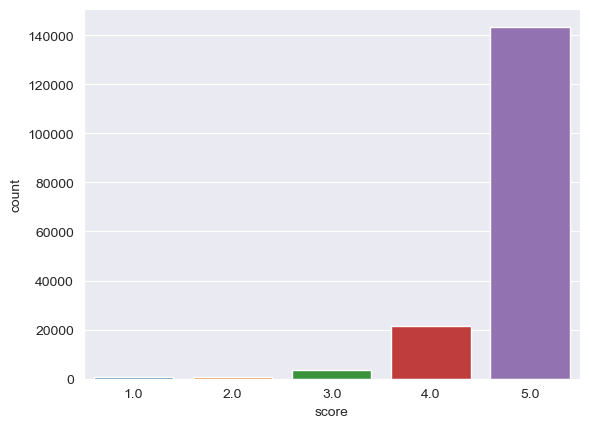

In [6]:
sns.set_style('darkgrid')
sns.countplot(x=data['score'])

- 평점을 성별 카테고리로 나누어 비교

In [7]:
score1 = data[data['score'] >= 4]
score2 = data[data['score'] < 4]

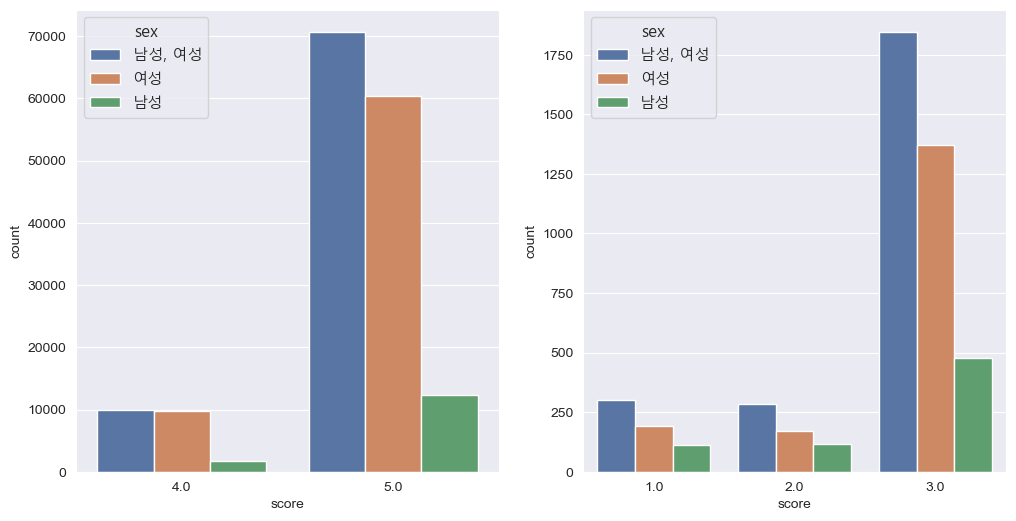

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

sns.countplot(x=score1['score'], hue=score1['sex'], ax=ax[0])
sns.countplot(x=score2['score'], hue=score2['sex'], ax=ax[1])
plt.show()

- 후기 종류별 평점 비교

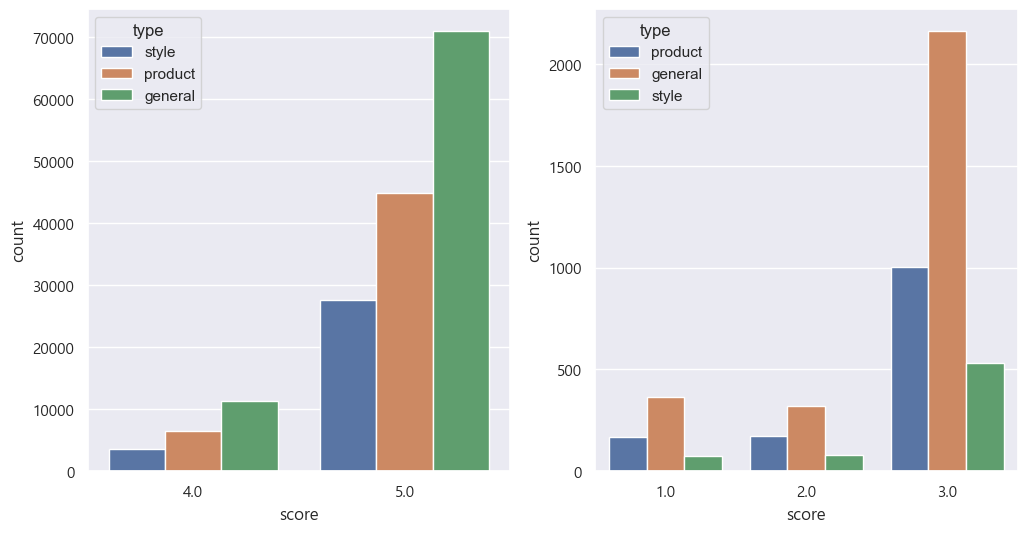

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
sns.set(style='darkgrid')

sns.countplot(x=score1['score'], hue=score1['type'], ax=ax[0])
sns.countplot(x=score2['score'], hue=score2['type'], ax=ax[1])
plt.show()

- 평점, 가격, '도움됨'을 받은 수, '스타일 좋아요'를 받은 수의 상관관계

In [10]:
data[['score', 'price', 'help_cnt', 'style_cnt']].corr()

,score,price,help_cnt,style_cnt
score,1.000000,0.035206,-0.052671,0.004731
price,0.035206,1.000000,0.018575,0.041105
help_cnt,-0.052671,0.018575,1.000000,0.485207
style_cnt,0.004731,0.041105,0.485207,1.000000


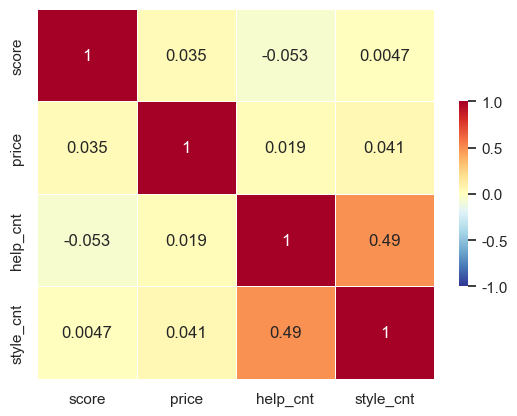

In [11]:
df = data[['score', 'price', 'help_cnt', 'style_cnt']].corr()

sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,
            linewidths=.5,
            cbar_kws={"shrink": .5},
            vmin = -1, vmax = 1
           )  
plt.show()

- 전체 리뷰 169734건 중 평점이 5점인 데이터가 143446건으로 데이터의 대다수를 차지한다.
- 대체로 남녀공용 상품의 리뷰가 가장 많으며, 여성용 신발, 남성용 신발 순으로 많다.
- 제품 카테고리에서는 부츠, 슬리퍼, 샌들, 구두 순으로 리뷰가 많다.
- 리뷰 중 상품 후기가 스타일 후기보다 많다.
- 가격과 평점 사이에 뚜렷한 상관관계는 없는 것으로 나타났다.
- 리뷰 텍스트를 심층 분석해서 리뷰 평점에 영향을 미치는 요소들을 확인해야 할 것 같다.

### 데이터 전처리

In [12]:
# 한글 외 텍스트 제거

review_removed = list(map(lambda review: re.sub('[^가-힣 ]', '', review), data['review']))
data['review'] = review_removed

In [13]:
# 데이터 분리 - 4~5점을 긍정, 1~3점을 부정으로 진행

review_pos = data[(data['score'] == 4) | (data['score'] == 5)]['review']
review_neg = data[(data['score'] == 1) | (data['score'] == 2) | (data['score'] == 3)]['review']

In [14]:
print(len(review_neg))
print(len(review_pos))
review_pos = review_pos.sample(5000)

# 부정적 리뷰 데이터는 4870건으로, 긍정적 리뷰 데이터는 164864건이다.
# test로 긍정적 리뷰는 랜덤으로 5000건만 추출하였다.

4870
164864


In [15]:
# 토큰화 - kkma로 리뷰에서 명사만 추출

from konlpy.tag import Kkma
kkma = Kkma()

review_tokenized_pos = list(map(lambda review: kkma.nouns(review), review_pos))
review_tokenized_neg = list(map(lambda review: kkma.nouns(review), review_neg))


In [16]:
# 최소 토큰 개수를 3, 최대 토큰 개수를 15로 선별

def select_review(reviews):
    review_prep = []
    for tokens in reviews:
        if 3 <= len(tokens) <= 15:
            review_prep.append(tokens)
    return review_prep

In [17]:
review_prep_pos = select_review(review_tokenized_pos)
review_prep_neg = select_review(review_tokenized_neg)

### 토픽 모델링

In [56]:
# 하이퍼파라미터 - 토픽 개수는 10개, 모델 학습 횟수는 15개로 임시 지정

NUM_TOPICS = 10
PASSES = 15

In [57]:
# 모델 학습 함수

def lda_modeling(review_prep):
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    
    model = gensim.models.ldamodel.LdaModel(corpus, 
                                            num_topics = NUM_TOPICS, 
                                            id2word = dictionary, 
                                            passes = PASSES)
    return model, corpus, dictionary

In [58]:
# 토픽별 단어 구성 출력 함수

def print_topic_prop(topics, RATING):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('topic' + RATING +  '.xlsx')
    display(topic_prop)

In [59]:
# 긍정적 리뷰 토픽 모델링

model, corpus, dictionary = lda_modeling(review_prep_pos)

In [61]:
RATING = 'pos'
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics, RATING)

,topic_num,word_prop
0,1,"0.101*""거"" + 0.031*""사이즈"" + 0.029*""여름"" + 0.029*""..."
1,2,"0.034*""디자인"" + 0.029*""발"" + 0.028*""키"" + 0.027*""신..."
2,3,"0.091*""사이즈"" + 0.065*""발"" + 0.060*""정"" + 0.059*""정..."
3,4,"0.043*""신"" + 0.039*""사이즈"" + 0.036*""발"" + 0.033*""평..."
4,5,"0.093*""배송"" + 0.049*""신발"" + 0.042*""만족"" + 0.028*""..."
5,6,"0.045*""부츠"" + 0.033*""때"" + 0.033*""신고"" + 0.030*""구..."
6,7,"0.054*""색상"" + 0.049*""거"" + 0.039*""발가락"" + 0.034*""..."
7,8,"0.061*""착화"" + 0.035*""가격"" + 0.031*""감도"" + 0.029*""..."
8,9,"0.092*""발"" + 0.052*""볼"" + 0.047*""신고"" + 0.040*""발볼..."
9,10,"0.088*""사이즈"" + 0.064*""추천"" + 0.054*""반"" + 0.033*""..."


In [62]:
# 부정적 리뷰 토픽 모델링

model, corpus, dictionary = lda_modeling(review_prep_neg)

In [63]:
RATING = 'neg'
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics, RATING)

,topic_num,word_prop
0,1,"0.076*""발가락"" + 0.040*""사이"" + 0.025*""적응"" + 0.024*..."
1,2,"0.033*""거"" + 0.024*""착화"" + 0.021*""배송"" + 0.021*""디..."
2,3,"0.120*""발"" + 0.056*""볼"" + 0.049*""발등"" + 0.046*""발볼..."
3,4,"0.032*""신고"" + 0.031*""때"" + 0.022*""처음"" + 0.021*""신..."
4,5,"0.093*""사이즈"" + 0.029*""정"" + 0.026*""발"" + 0.025*""정..."
5,6,"0.036*""때"" + 0.028*""발"" + 0.025*""신발"" + 0.014*""디자..."
6,7,"0.023*""교환"" + 0.022*""불편"" + 0.021*""때"" + 0.019*""사..."
7,8,"0.030*""거"" + 0.030*""가격"" + 0.027*""대비"" + 0.022*""가..."
8,9,"0.024*""뒷"" + 0.023*""마감"" + 0.023*""꿈"" + 0.019*""신발..."
9,10,"0.047*""사이즈"" + 0.033*""생각"" + 0.030*""불편"" + 0.028*..."


- 긍정적 리뷰의 핵심 주제는 3, 8번 토픽, 부정적 리뷰의 핵심 주제는 1, 3, 9번 토픽에서 드러나는 양상이다.
- 긍정-3번 토픽 (사이즈) : 0.091*"사이즈" + 0.065*"발" + 0.060*"정" + 0.059*"정사이즈" + 0.021*"신고" + 0.021*"생각" + 0.020*"길이" + 0.020*"거" + 0.019*"신발" + 0.018*"편"
- 긍정-8번 토픽 (착화감) : 0.061*"착화" + 0.035*"가격" + 0.031*"감도" + 0.029*"디자인" + 0.029*"착화감도" + 0.026*"성비" + 0.023*"수" + 0.022*"생각" + 0.022*"편안" + 0.020*"사이즈"
- 부정-1번 토픽 (착화감-발가락 부분) : 0.076*"발가락" + 0.040*"사이" + 0.025*"적응" + 0.024*"부분" + 0.021*"신" + 0.013*"가격" + 0.013*"엄지" + 0.012*"발" + 0.011*"교환" + 0.011*"신발"
- 부정-3번 토픽 (착화감-발볼 부분) : 0.120*"발" + 0.056*"볼" + 0.049*"발등" + 0.046*"발볼" + 0.021*"불편" + 0.020*"착화" + 0.020*"거" + 0.019*"생각" + 0.019*"신발" + 0.018*"편"
- 부정-9번 토픽 (착화감-뒷꿈치 부분) : 0.024*"뒷" + 0.023*"마감" + 0.023*"꿈" + 0.019*"신발" + 0.018*"디자인" + 0.017*"뒷꿈" + 0.014*"무" + 0.012*"한데" + 0.012*"하나" + 0.012*"발등"

- 리뷰들 모두 착화감이 가장 중요한 요소로 꼽히지만, 긍정적 리뷰를 남긴 사용자는 착화감에 더불어 본인에게 맞는 사이즈에서 만족감을 느끼고,
- 부정적 리뷰를 남긴 사용자는 착화감 중 불편했던 부분을 묘사하는 경향이 있다.
- 하지만 전체적으로는 특정 topic을 보여주는 단어의 집합이라 하기엔 아직 부족하다.
- 단어 선정(특정 단어 제거)에 대해 좀 더 다양하게 시도해야 할 것 같다.

- 코드 참고 : https://heytech.tistory.com/401